In [1]:
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install pyspark
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movie_path = '../data/movies_data.csv'

movies_df = pd.read_csv(
    movie_path,
    low_memory=False
)

print(movies_df.head())
print(movies_df.dtypes)

      tconst titleType                   primaryTitle  isAdult  releaseYear  \
0  tt0000009     movie                     Miss Jerry        0         1894   
1  tt0000147     movie  The Corbett-Fitzsimmons Fight        0         1897   
2  tt0000574     movie    The Story of the Kelly Gang        0         1906   
3  tt0000591     movie               The Prodigal Son        0         1907   
4  tt0000615     movie             Robbery Under Arms        0         1907   

   releaseMonth releaseDate  runtime_consolidated  imdb_averageRating  \
0            10  1894-10-08                  45.0                 5.4   
1             1  1897-01-01                 100.0                 5.3   
2            12  1906-12-26                  70.0                 6.0   
3             6  1907-06-19                  90.0                 5.6   
4            10  1907-10-01                  60.0                 4.3   

   imdb_numVotes  ...  bayesian_averageRating  profit_ratio  \
0          218.0  ...  

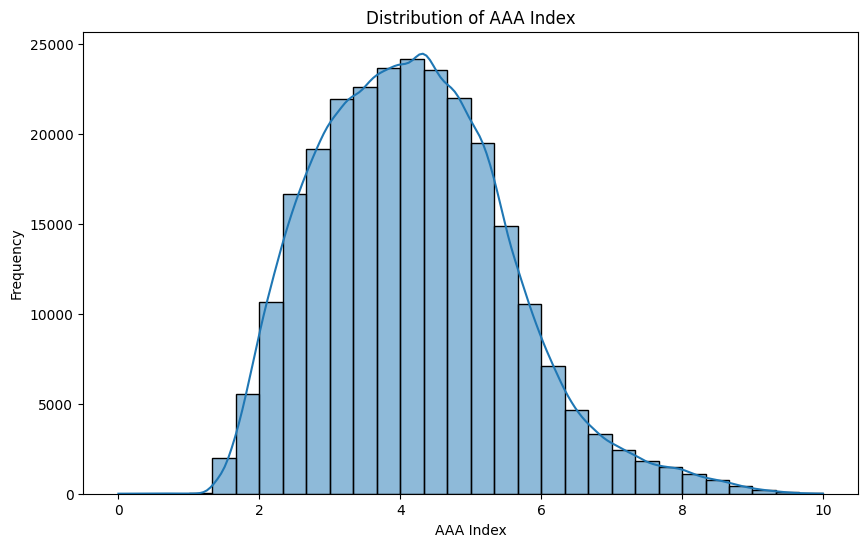

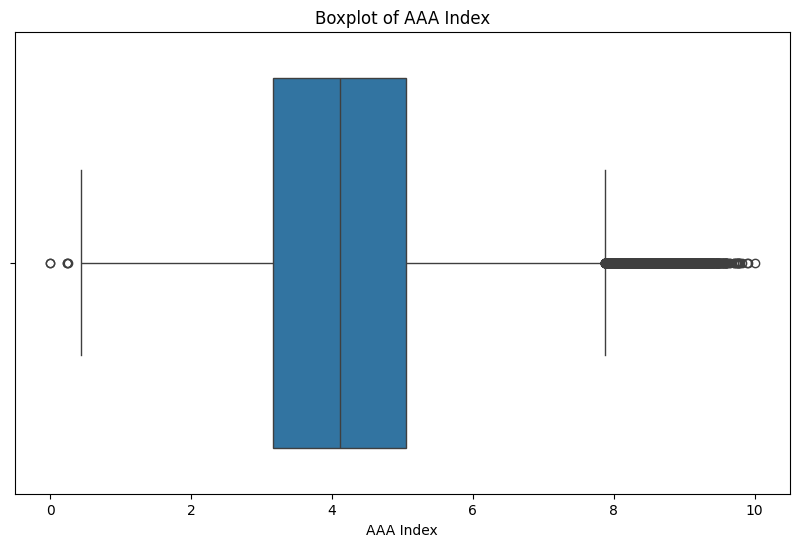

In [3]:
# Histogram & Boxplot of AAA Index

plt.figure(figsize=(10,6))
sns.histplot(movies_df['aaa_index'], bins=30, kde=True)
plt.title("Distribution of AAA Index")
plt.xlabel("AAA Index")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=movies_df['aaa_index'])
plt.title("Boxplot of AAA Index")
plt.xlabel("AAA Index")
plt.show()

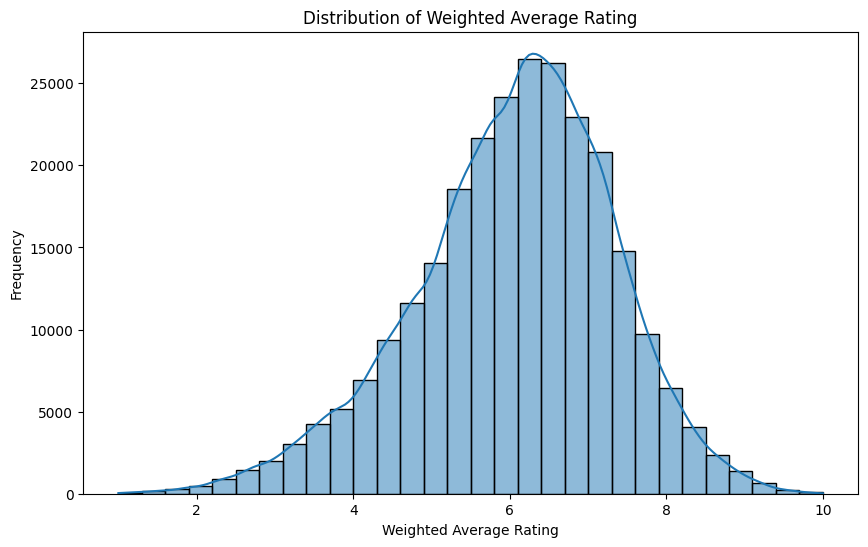

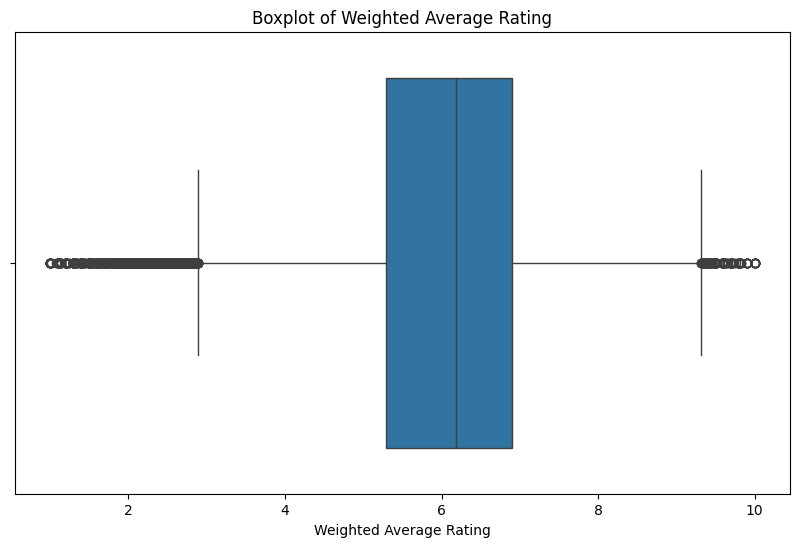

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(movies_df['weighted_averageRating'], bins=30, kde=True)
plt.title("Distribution of Weighted Average Rating")
plt.xlabel("Weighted Average Rating")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=movies_df['weighted_averageRating'])
plt.title("Boxplot of Weighted Average Rating")
plt.xlabel("Weighted Average Rating")
plt.show()

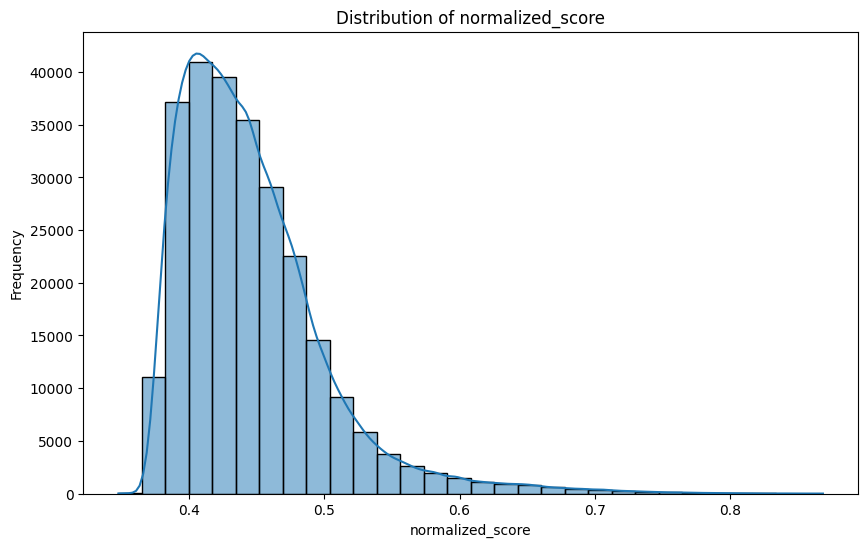

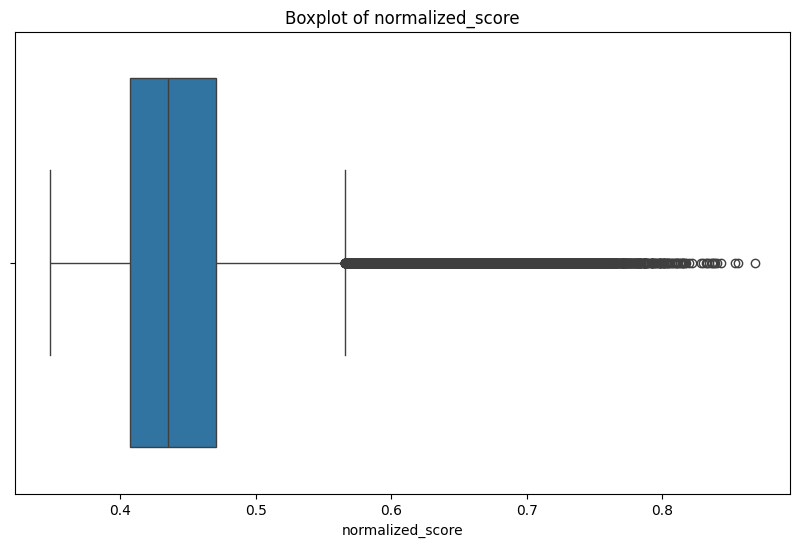

In [5]:
measured_column = 'normalized_score'

plt.figure(figsize=(10,6))
sns.histplot(movies_df[measured_column], bins=30, kde=True)
plt.title(f"Distribution of {measured_column}")
plt.xlabel(f"{measured_column}")
plt.ylabel(f"Frequency")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=movies_df[measured_column])
plt.title(f"Boxplot of {measured_column}")
plt.xlabel(f"{measured_column}")
plt.show()

array([[<Axes: title={'center': 'bayesian_averageRating'}>,
        <Axes: title={'center': 'log_votes'}>],
       [<Axes: title={'center': 'normalized_popularity'}>,
        <Axes: title={'center': 'normalized_profit_impact'}>]],
      dtype=object)

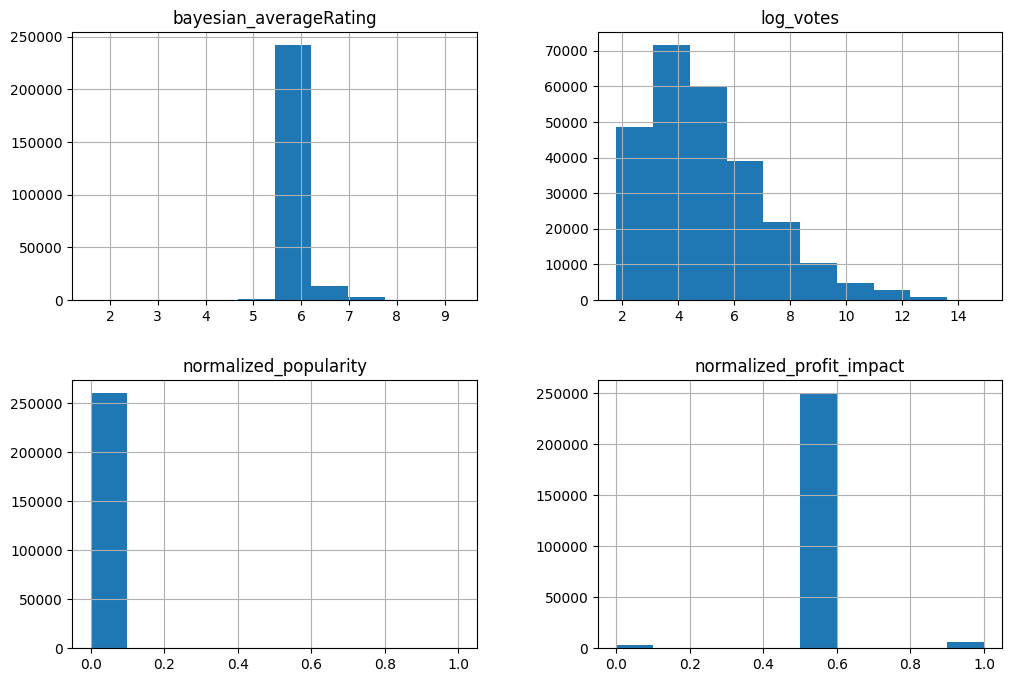

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12,8))
movies_df[['bayesian_averageRating', 'log_votes', 'normalized_popularity', 'normalized_profit_impact']].hist(ax=axes)

In [10]:
top_01_per = np.percentile(movies_df['aaa_index'], 99.9)
top_05_per = np.percentile(movies_df['aaa_index'], 99.5)

print(f"Top 0.1%: {top_01_per}")
print(f"Top 0.5%: {top_05_per}")

Top 0.1%: 9.03809583536335
Top 0.5%: 8.40885636573711


In [18]:
Q1 = movies_df['aaa_index'].quantile(0.25)
Q3 = movies_df['aaa_index'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

outliers = movies_df[movies_df['aaa_index'] > upper_bound]

print(upper_bound)
print(outliers[['primaryTitle', 'releaseYear', 'aaa_index', 'profit_ratio', 'bayesian_averageRating', 'total_numVotes', 'popularity']].head())

7.879972543097693
                         primaryTitle  releaseYear  aaa_index  profit_ratio  \
1072      The Cabinet of Dr. Caligari         1920   8.018448      0.489500   
1486                          The Kid         1921   8.860115     10.000000   
1722  Nosferatu: A Symphony of Horror         1922   8.364804      0.000000   
1969                     Safety Last!         1923   8.133728     12.396694   
2218                     Sherlock Jr.         1924   8.322927      0.000000   

      bayesian_averageRating  total_numVotes  popularity  
1072                7.767814         74090.0      13.887  
1486                8.057827        141462.0      11.172  
1722                7.661562        117858.0      21.105  
1969                7.495289         24122.0      11.505  
2218                7.896614         61246.0      13.244  


In [9]:
sorted_outliers = outliers.sort_values(by='aaa_index', ascending=True)

print(sorted_outliers[['primaryTitle', 'releaseYear', 'aaa_index', 'profit_ratio', 'bayesian_averageRating', 'total_numVotes', 'popularity']].head(10))

                        primaryTitle  releaseYear  aaa_index  profit_ratio  \
26482         Rocco and His Brothers         1960   7.880068      0.000000   
62838   Pretty Village, Pretty Flame         1996   7.880401      0.000000   
75836              Waking Ned Devine         1998   7.880678     14.505327   
227738                    Visaaranai         2015   7.880843      4.923077   
244380                     Forgotten         2017   7.880923      0.000000   
28774                   Winter Light         1963   7.881094      0.000000   
135881                   Secretariat         2010   7.881134      1.723482   
29826                      Red Beard         1965   7.881167      0.000000   
109062          Under the Tuscan Sun         2003   7.881501      3.271040   
212853                         Finch         2021   7.881568      0.000000   

        bayesian_averageRating  total_numVotes  popularity  
26482                 7.564055         23953.0      15.651  
62838              

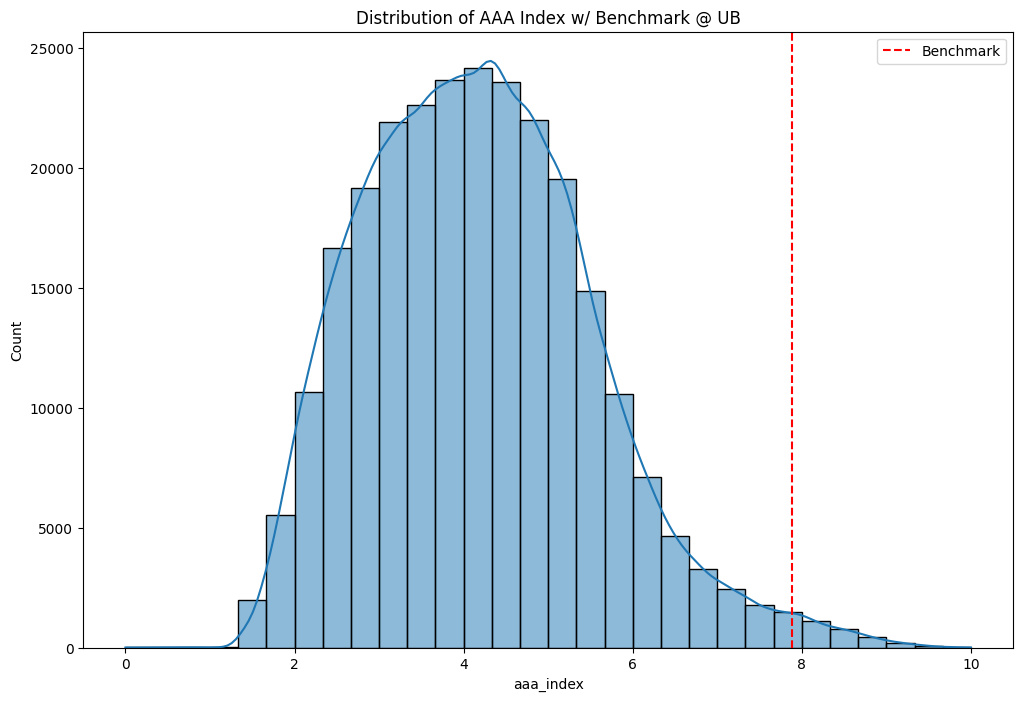

Benchmark (Upper Bound) for Hit Movies: 7.879972543097693


In [22]:
benchmark = upper_bound

plt.figure(figsize=(12,8))
sns.histplot(movies_df['aaa_index'], bins=30, kde=True)
plt.axvline(benchmark, color='red', linestyle='--', label='Benchmark')
plt.title("Distribution of AAA Index w/ Benchmark @ UB")
plt.legend()
plt.show()

print(f"Benchmark (Upper Bound) for Hit Movies: {benchmark}")

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Benchmark setting
Q1 = movies_df['aaa_index'].quantile(0.25)
Q3 = movies_df['aaa_index'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

benchmark = upper_bound

movies_df['hit_movie'] = (movies_df['aaa_index'] > benchmark).astype(int)

features = [
    'normalized_bayesian_averageRating',
    'normalized_log_votes',
    'normalized_popularity',
    'releaseMonth'
]

X = movies_df[features]
y = movies_df['hit_movie']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred_prob = clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9971361024083649
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51423
           1       0.93      0.81      0.87       604

    accuracy                           1.00     52027
   macro avg       0.97      0.91      0.93     52027
weighted avg       1.00      1.00      1.00     52027

